<a href="https://colab.research.google.com/github/karampreet-works/CarAnimatedByCss/blob/main/BankChurnPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importing the necessary and required machine learning


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = "/content/drive/MyDrive/bankChurnPrediction /Churn_Modelling.csv"
model = pd.read_csv(path)

In [4]:
model.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [5]:
model.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203700
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402769
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000


Nunique Tell us about number of different value of the column 

In [6]:
model.nunique()

RowNumber          10000
CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6382
NumOfProducts          4
HasCrCard              2
IsActiveMember         2
EstimatedSalary     9999
Exited                 2
dtype: int64

**Dropping the column which don't have much signifiance in finding the output **

In [7]:
model.drop(['RowNumber' , 'CustomerId' , 'Surname'] , axis ='columns' , inplace=True)

In [8]:
model.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
model.dtypes

CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

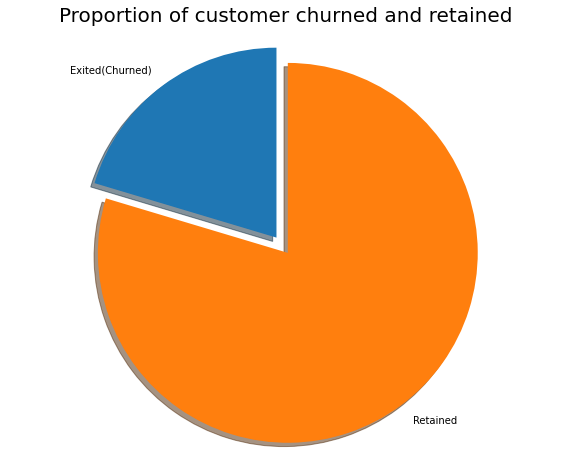

In [10]:
labels = 'Exited(Churned)', 'Retained'
sizes = [model.Exited[model['Exited']==1].count(), model.Exited[model['Exited']==0].count()]
explode = (0, .1)
fig1, ax1 = plt.subplots(figsize=(10, 8))
ax1.pie(sizes, explode=explode, labels=labels ,
        shadow=True, startangle=90)
ax1.axis('equal')
plt.title("Proportion of customer churned and retained", size = 20)
plt.show()

In [11]:
import seaborn as sns

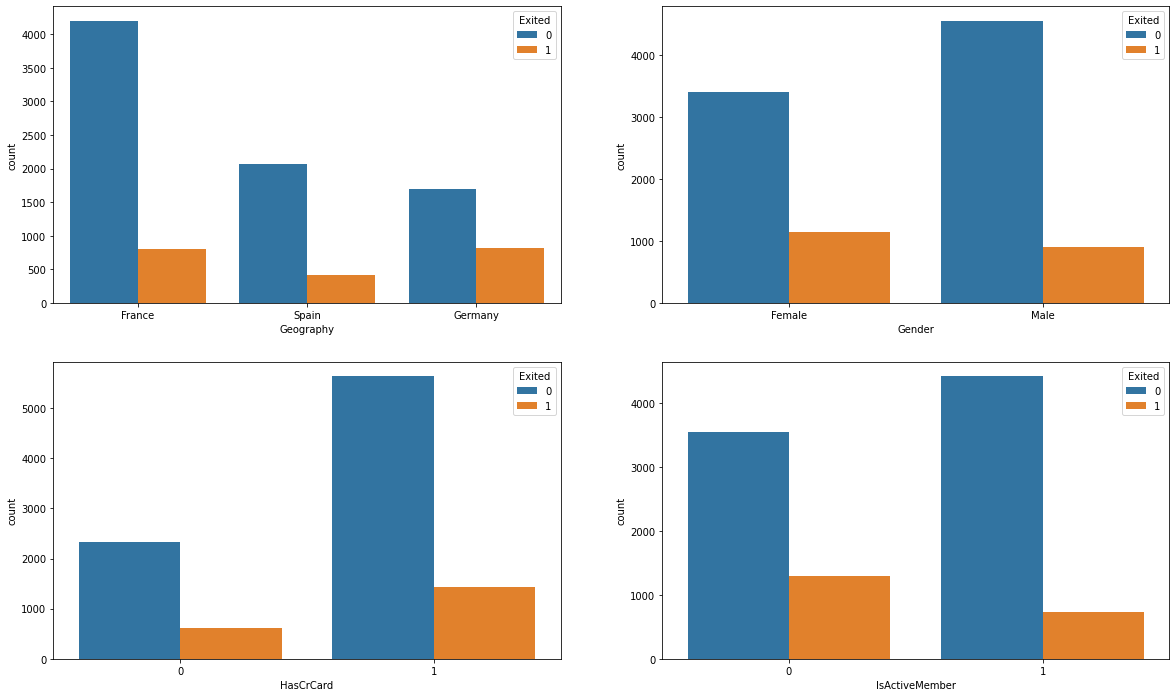

In [12]:
    # We first review the 'Status' relation with categorical variables
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = model, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = model, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = model, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = model, ax=axarr[1][1])

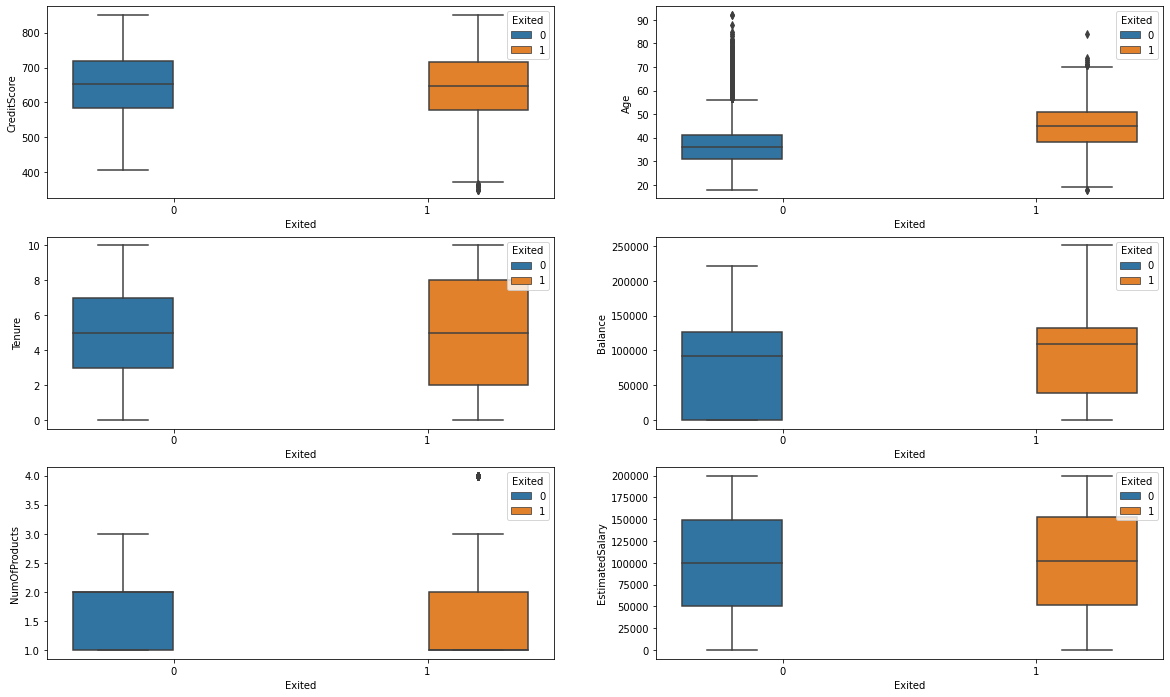

In [13]:
# Relations based on the continuous data attributes
fig, axarr = plt.subplots(3, 2, figsize=(20, 12))
sns.boxplot(y='CreditScore',x = 'Exited', hue = 'Exited',data = model, ax=axarr[0][0])
sns.boxplot(y='Age',x = 'Exited', hue = 'Exited',data = model , ax=axarr[0][1])
sns.boxplot(y='Tenure',x = 'Exited', hue = 'Exited',data = model, ax=axarr[1][0])
sns.boxplot(y='Balance',x = 'Exited', hue = 'Exited',data = model, ax=axarr[1][1])
sns.boxplot(y='NumOfProducts',x = 'Exited', hue = 'Exited',data = model, ax=axarr[2][0])
sns.boxplot(y='EstimatedSalary',x = 'Exited', hue = 'Exited',data = model, ax=axarr[2][1])

/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3208: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  return asarray(a).size
/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


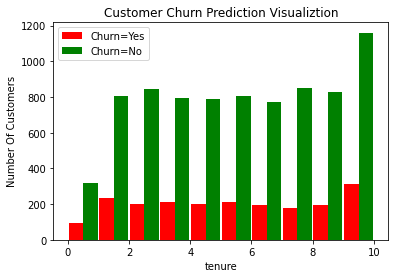

In [14]:
tenure_churn_no = model[model.Exited==0].Tenure
tenure_churn_yes = model[model.Exited==1].Tenure

plt.xlabel("tenure")
plt.ylabel("Number Of Customers")
plt.title("Customer Churn Prediction Visualiztion")

plt.hist([tenure_churn_yes, tenure_churn_no], rwidth=0.95, color=['red','green'],label=['Churn=Yes','Churn=No'])
plt.legend()

Feature Engineering 


(-1.0, 5.0)

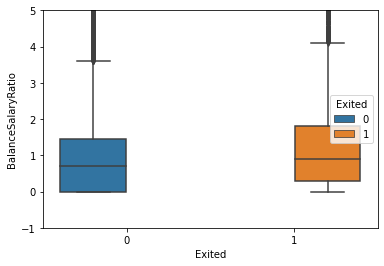

In [15]:
model['BalanceSalaryRatio'] =model.Balance/model.EstimatedSalary
sns.boxplot(y='BalanceSalaryRatio',x = 'Exited', hue = 'Exited',data = model)
plt.ylim(-1, 5)

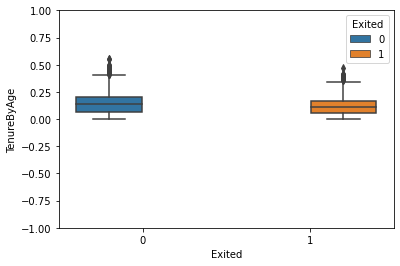

In [16]:
model['TenureByAge'] = model.Tenure/(model.Age)
sns.boxplot(y='TenureByAge',x = 'Exited', hue = 'Exited',data = model)
plt.ylim(-1, 1)
plt.show()

In [17]:
def print_unique_col_values(model):
       for column in model:
            if model[column].dtypes=='object':
                print(f'{column}: {model[column].unique()}')

In [18]:
print_unique_col_values(model)

Geography: ['France' 'Spain' 'Germany']
Gender: ['Female' 'Male']


label encoding

In [19]:
model['Gender'].replace({'Male': 1,'Female': 0},inplace=True)

One Hot Encoding 

In [20]:
df1 = pd.get_dummies(data=model, columns=['Geography'])
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,619,0,42,2,0.00,1,1,1,101348.88,1,0.000000,0.047619,1,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,0.744677,0.024390,0,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,1,1.401375,0.190476,1,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0.000000,0.025641,1,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1.587055,0.046512,0,0,1


In [21]:
scale_var = ['Tenure','CreditScore','Age','Balance','NumOfProducts','EstimatedSalary']

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df1[scale_var] = scaler.fit_transform(df1[scale_var])

In [22]:
df1.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,BalanceSalaryRatio,TenureByAge,Geography_France,Geography_Germany,Geography_Spain
0,0.538,0,0.324324,0.2,0.000000,0.000000,1,1,0.506735,1,0.000000,0.047619,1,0,0
1,0.516,0,0.310811,0.1,0.334031,0.000000,0,1,0.562709,0,0.744677,0.024390,0,0,1
2,0.304,0,0.324324,0.8,0.636357,0.666667,1,0,0.569654,1,1.401375,0.190476,1,0,0
3,0.698,0,0.283784,0.1,0.000000,0.333333,0,0,0.469120,0,0.000000,0.025641,1,0,0
4,1.000,0,0.337838,0.2,0.500246,0.000000,1,1,0.395400,0,1.587055,0.046512,0,0,1


In [23]:
X = df1.drop('Exited',axis='columns')  ##independent features
y = df1['Exited']  ##dependent feature

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=5)

In [24]:
len(X_train.columns)

14

In [25]:
from sklearn.tree import DecisionTreeClassifier

In [26]:
from  sklearn.ensemble  import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

In [27]:
from sklearn.metrics import accuracy_score 

In [28]:
models = []
models.append(('LR', LogisticRegression(random_state=10101)))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier(random_state=10101)))
models.append(('RF', RandomForestClassifier(random_state=10101)))
models.append(('SVM', SVC( gamma= 'auto', random_state=10101)))

results = []
names = []

In [29]:
for name , model in models:
  model.fit(X_train , y_train)
  y_pred = model.predict(X_test)
  accuracy  = accuracy_score(y_test , y_pred)
  msg = "%s : (%f)" %(name , accuracy)
  print(msg)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LR : (0.807000)
KNN : (0.783500)
CART : (0.792500)
RF : (0.857000)
SVM : (0.797500)


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


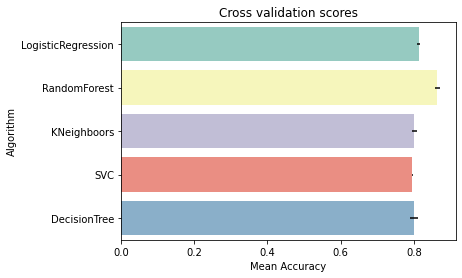

In [30]:
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold
# Cross validate model with Kfold stratified cross validation
kfold = StratifiedKFold(n_splits=5)
# Modeling step Test differents algorithms 
random_state = 10101
classifiers = []
classifiers.append(LogisticRegression())
classifiers.append(RandomForestClassifier())
classifiers.append(KNeighborsClassifier())
classifiers.append(SVC())
classifiers.append(DecisionTreeClassifier())
cv_results = []
for classifier in classifiers :
    cv_results.append(cross_val_score(classifier, X_train, y = y_train, scoring = "accuracy", cv = kfold, n_jobs=4))
cv_means = []
cv_std = []
for cv_result in cv_results:
    cv_means.append(cv_result.mean())
    cv_std.append(cv_result.std())
cv_res = pd.DataFrame({"CrossValMeans":cv_means,"CrossValerrors": cv_std,"Algorithm":["LogisticRegression","RandomForest","KNeighboors","SVC","DecisionTree"]})
g = sns.barplot("CrossValMeans","Algorithm",data = cv_res, palette="Set3",orient = "h",**{'xerr':cv_std})
g.set_xlabel("Mean Accuracy")
g = g.set_title("Cross validation scores")  

model Prediction

In [31]:
import tensorflow as tf
from tensorflow import keras


In [32]:


model = keras.Sequential([
    keras.layers.Dense(12, input_shape=(None,32,14), activation='relu'),
    keras.layers.Dense(6, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])


model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

model.fit(X_train, y_train, epochs=100)

Epoch 1/100
250/250 [==============================] - 1s 1ms/step - loss: 0.5693 - accuracy: 0.7812
Epoch 2/100
250/250 [==============================] - 0s 1ms/step - loss: 0.5063 - accuracy: 0.7954
Epoch 3/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4795 - accuracy: 0.7950
Epoch 4/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4695 - accuracy: 0.7930
Epoch 5/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4604 - accuracy: 0.7947
Epoch 6/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4518 - accuracy: 0.7951
Epoch 7/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4426 - accuracy: 0.7954
Epoch 8/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4350 - accuracy: 0.7951
Epoch 9/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4285 - accuracy: 0.7951
Epoch 10/100
250/250 [==============================] - 0s 1ms/step - loss: 0.4247 - accura

In [33]:
model.evaluate(X_test, y_test)

63/63 [==============================] - 0s 1ms/step - loss: 0.3585 - accuracy: 0.8540


[0.35847628116607666, 0.8539999723434448]

In [34]:
yp = model.predict(X_test)
yp

array([[0.01995304],
       [0.08151779],
       [0.0524976 ],
       ...,
       [0.00929046],
       [0.02910972],
       [0.05103138]], dtype=float32)

Coversion into accuracy score 

In [35]:
y_pred = []
for element in yp:
    if element > 0.5:
        y_pred.append(1)
    else:
        y_pred.append(0)

In [36]:
y_pred 

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,


In [37]:
from sklearn.metrics import confusion_matrix , classification_report

print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1595
           1       0.75      0.41      0.54       405

    accuracy                           0.85      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.84      0.85      0.84      2000



Text(69.0, 0.5, 'Truth')

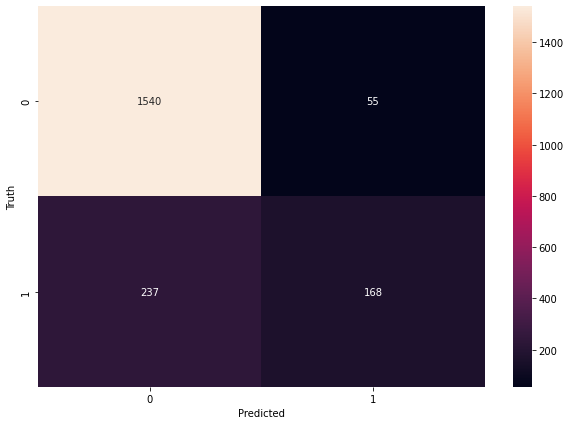

In [38]:
import seaborn as sn
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_pred)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

In [39]:
from sklearn.metrics import accuracy_score

In [40]:
print("Accuracy score is: ", accuracy_score(y_test,y_pred)*100,"%")

Accuracy score is:  85.39999999999999 %


Auto ML model 

In [41]:
!pip install requests
!pip install tabulate
!pip install "colorama>=0.3.8"
!pip install future

In [42]:
!pip install h2o

     |████████████████████████████████| 177.0 MB 18 kB/s 
  Created wheel for h2o: filename=h2o-3.36.1.1-py2.py3-none-any.whl size=177068062 sha256=add088486cdd0d1985d3c6bd55bb430dffa9e750a2707268338d9e81960d27e0
  Stored in directory: /root/.cache/pip/wheels/a6/d9/ab/5442447c7e2ccf07f66aa8b79f3877ce5382f0b95e6c0c797b
Successfully built h2o


In [43]:
import h2o
from h2o.automl import H2OAutoML
h2o.init(max_mem_size='16G')  ##  the h2o.init() makes sure that no prior instance of H2O is running.

Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.15" 2022-04-19; OpenJDK Runtime Environment (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1); OpenJDK 64-Bit Server VM (build 11.0.15+10-Ubuntu-0ubuntu0.18.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.7/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmph_9et0o9
  JVM stdout: /tmp/tmph_9et0o9/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmph_9et0o9/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.36.1.1
H2O_cluster_version_age:,25 days
H2O_cluster_name:,H2O_from_python_unknownUser_fdvfv9
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,16 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [44]:
df = h2o.import_file("/content/drive/MyDrive/bankChurnPrediction /Churn_Modelling.csv")

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [45]:
df.head()

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
2,1.56473e+07,Hill,608,Spain,Female,41,1,83807.9,1,0,1,112543,0
3,1.56193e+07,Onio,502,France,Female,42,8,159661,3,1,0,113932,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
5,1.57379e+07,Mitchell,850,Spain,Female,43,2,125511,1,1,1,79084.1,0
6,1.5574e+07,Chu,645,Spain,Male,44,8,113756,2,1,0,149757,1
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
8,1.56561e+07,Obinna,376,Germany,Female,29,4,115047,4,1,0,119347,1
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
10,1.55924e+07,H?,684,France,Male,27,2,134604,1,1,1,71725.7,0


## H2O auto ml can do all the data preprocessing techniques

In [46]:
df_train,df_test= df.split_frame(ratios=[.8])

## splitting of the data 

In [47]:
df_train

RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
1,1.56346e+07,Hargrave,619,France,Female,42,2,0,1,1,1,101349,1
4,1.57014e+07,Boni,699,France,Female,39,1,0,2,0,0,93826.6,0
7,1.55925e+07,Bartlett,822,France,Male,50,7,0,2,1,1,10062.8,0
9,1.57924e+07,He,501,France,Male,44,4,142051,2,0,1,74940.5,0
11,1.57678e+07,Bearce,528,France,Male,31,6,102017,2,0,0,80181.1,0
14,1.56915e+07,Chin,549,France,Female,25,5,0,2,0,0,190858,0
15,1.56009e+07,Scott,635,Spain,Female,35,7,0,2,1,1,65951.6,0
16,1.5644e+07,Goforth,616,Germany,Male,45,3,143129,2,0,1,64327.3,0
18,1.57882e+07,Henderson,549,Spain,Female,24,9,0,2,1,1,14406.4,0
21,1.55777e+07,McDonald,732,France,Male,41,8,0,2,1,1,170886,0


In [48]:
y = "Exited"  ## dependent variable
x = df.columns  ## Independent variable
x.remove(y)
x.remove('CustomerId')
x.remove('RowNumber')
x.remove('Surname')

In [49]:
aml = H2OAutoML(max_runtime_secs=300,max_models = 10, seed = 10, verbosity="info", nfolds=2)

## fitting the model 

In [50]:
aml.train(x=x,y=y, training_frame=df_train)

AutoML progress: |
21:52:26.94: Project: AutoML_1_20220508_215226
21:52:26.95: Setting stopping tolerance adaptively based on the training frame: 0.011163607017227663
21:52:26.96: Build control seed: 10
21:52:26.112: training frame: Frame key: AutoML_1_20220508_215226_training_py_3_sid_b36a    cols: 14    rows: 8024  chunks: 8    size: 429674  checksum: -8644859550762369242
21:52:26.112: validation frame: NULL
21:52:26.113: leaderboard frame: NULL
21:52:26.113: blending frame: NULL
21:52:26.113: response column: Exited
21:52:26.113: fold column: null
21:52:26.113: weights column: null
21:52:26.155: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), grid_1 (4g, 90w), lr_search (7g, 30w)]}, {GLM : [def_1 (1g, 10w)]}, {DRF : [def_1 (2g, 10w), XRT (3g, 10w)]}, {GBM : [def_5 (1g, 10w), def_2 (2g, 10w), def_3 (2g, 10w), def_4 (2g, 10w), def_1 (3g, 10w), grid_1 (4g, 60w), lr_annealing (7g, 10w)]}, {DeepLearning : [def_1 (3g, 10w), grid_1 (4g, 30w), grid_2

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,0.207206,0.002766,0.209162,0.205250
1,mean_residual_deviance,0.101445,0.002693,0.103349,0.099541
2,mse,0.101445,0.002693,0.103349,0.099541
3,null_deviance,636.877600,7.276905,642.023130,631.732060
4,r2,0.360656,0.000712,0.361160,0.360153
5,residual_deviance,406.910550,4.203360,409.882750,403.938320
6,rmse,0.318491,0.004227,0.321480,0.315502
7,rmsle,0.223815,0.001993,0.225224,0.222405


In [51]:
lb = aml.leaderboard

In [52]:
lb

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_1_AutoML_1_20220508_215226,0.318472,0.101425,0.207111,0.223815,0.101425
StackedEnsemble_BestOfFamily_1_AutoML_1_20220508_215226,0.319423,0.102031,0.208314,0.224508,0.102031
GBM_2_AutoML_1_20220508_215226,0.320111,0.102471,0.209949,0.224698,0.102471
GBM_1_AutoML_1_20220508_215226,0.320866,0.102955,0.213265,0.225577,0.102955
GBM_3_AutoML_1_20220508_215226,0.322433,0.103963,0.21125,0.226698,0.103963
GBM_4_AutoML_1_20220508_215226,0.325833,0.106167,0.214135,0.229752,0.106167
XGBoost_3_AutoML_1_20220508_215226,0.326574,0.106651,0.215334,0.231131,0.106651
DRF_1_AutoML_1_20220508_215226,0.326997,0.106927,0.213096,0.231357,0.106927
XRT_1_AutoML_1_20220508_215226,0.340416,0.115883,0.25405,0.24428,0.115883
XGBoost_2_AutoML_1_20220508_215226,0.353219,0.124764,0.239219,0.255724,0.124764


In [53]:
model_ids = list(aml.leaderboard['model_id'].as_data_frame().iloc[:,0])

In [54]:
model_ids

['StackedEnsemble_AllModels_1_AutoML_1_20220508_215226',
 'StackedEnsemble_BestOfFamily_1_AutoML_1_20220508_215226',
 'GBM_2_AutoML_1_20220508_215226',
 'GBM_1_AutoML_1_20220508_215226',
 'GBM_3_AutoML_1_20220508_215226',
 'GBM_4_AutoML_1_20220508_215226',
 'XGBoost_3_AutoML_1_20220508_215226',
 'DRF_1_AutoML_1_20220508_215226',
 'XRT_1_AutoML_1_20220508_215226',
 'XGBoost_2_AutoML_1_20220508_215226',
 'XGBoost_1_AutoML_1_20220508_215226',
 'GLM_1_AutoML_1_20220508_215226']

In [55]:
aml.leader.model_performance(df_test)


ModelMetricsRegressionGLM: stackedensemble
** Reported on test data. **

MSE: 0.10932159674174861
RMSE: 0.33063816588795164
MAE: 0.21542626128522885
RMSLE: 0.23039009881541303
R^2: 0.3783974327661137
Mean Residual Deviance: 0.10932159674174861
Null degrees of freedom: 1975
Residual degrees of freedom: 1968
Null deviance: 349.29285461163767
Residual deviance: 216.01947516169525
AIC: 1251.8455309056421


In [56]:
h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220508_215226

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07445641482012652
RMSE: 0.27286702772619215
MAE: 0.1737968591119104
RMSLE: 0.1896131547391638
R^2: 0.5307292073291662
Mean Residual Deviance: 0.07445641482012652
Null degrees of freedom: 8023
Residual degrees of freedom: 8016
Null deviance: 1273.1205134596212
Residual deviance: 597.4382725166952
AIC: 1946.4537020629568

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10142454245135729
RMSE: 0.318472200437271
MAE: 0.20711078898118662
RMSLE: 0.2238146403376925
R^2: 0.360759236831272
Mean Residual Deviance: 0.10142454245135729
Null degrees of freedom: 8023
Residual degrees of freedom: 8015
Null deviance: 1273.7552182942707
Residual deviance: 813.8305286296909
AIC: 4428.681567709325

Cross-Validation Metrics 

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,0.207206,0.002766,0.209162,0.205250
1,mean_residual_deviance,0.101445,0.002693,0.103349,0.099541
2,mse,0.101445,0.002693,0.103349,0.099541
3,null_deviance,636.877600,7.276905,642.023130,631.732060
4,r2,0.360656,0.000712,0.361160,0.360153
5,residual_deviance,406.910550,4.203360,409.882750,403.938320
6,rmse,0.318491,0.004227,0.321480,0.315502
7,rmsle,0.223815,0.001993,0.225224,0.222405


In [57]:

output= h2o.get_model([mid for mid in model_ids if "StackedEnsemble" in mid][0])
output.params

{'auc_type': {'actual': 'AUTO', 'default': 'AUTO', 'input': 'AUTO'},
 'base_models': {'actual': [{'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_2_AutoML_1_20220508_215226',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_1_AutoML_1_20220508_215226',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_3_AutoML_1_20220508_215226',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'GBM_4_AutoML_1_20220508_215226',
    'type': 'Key<Keyed>'},
   {'URL': None,
    '__meta': {'schema_name': 'KeyV3',
     'schema_type': 'Key<Keyed>',
     'schema_version': 3},
    'name': 'XGBoost_3_AutoML

In [58]:
aml.leader

Model Details
H2OStackedEnsembleEstimator :  Stacked Ensemble
Model Key:  StackedEnsemble_AllModels_1_AutoML_1_20220508_215226

No model summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 0.07445641482012652
RMSE: 0.27286702772619215
MAE: 0.1737968591119104
RMSLE: 0.1896131547391638
R^2: 0.5307292073291662
Mean Residual Deviance: 0.07445641482012652
Null degrees of freedom: 8023
Residual degrees of freedom: 8016
Null deviance: 1273.1205134596212
Residual deviance: 597.4382725166952
AIC: 1946.4537020629568

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 0.10142454245135729
RMSE: 0.318472200437271
MAE: 0.20711078898118662
RMSLE: 0.2238146403376925
R^2: 0.360759236831272
Mean Residual Deviance: 0.10142454245135729
Null degrees of freedom: 8023
Residual degrees of freedom: 8015
Null deviance: 1273.7552182942707
Residual deviance: 813.8305286296909
AIC: 4428.681567709325

Cross-Validation Metrics 

,,mean,sd,cv_1_valid,cv_2_valid
0,mae,0.207206,0.002766,0.209162,0.205250
1,mean_residual_deviance,0.101445,0.002693,0.103349,0.099541
2,mse,0.101445,0.002693,0.103349,0.099541
3,null_deviance,636.877600,7.276905,642.023130,631.732060
4,r2,0.360656,0.000712,0.361160,0.360153
5,residual_deviance,406.910550,4.203360,409.882750,403.938320
6,rmse,0.318491,0.004227,0.321480,0.315502
7,rmsle,0.223815,0.001993,0.225224,0.222405


In [59]:
y_pred=aml.leader.predict(df_test)

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [60]:
y_pred

predict
0.163789
1.02753
0.113145
0.129928
1.02288
0.0203247
-0.0127108
0.0488177
1.00599
0.63812
